# Etude des fleurs

Python 3 est livré avec de nombreuses bibliothèques d’analyses utiles installées.
Par exemple, voici plusieurs paquets utiles à charger :

In [0]:
import numpy as np #Algebre linéaire
import pandas as pd #Traitement des données, sur fichier CSV (par exemple, pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
iris = pd.read_csv('IRIS.csv')



In [67]:
iris.head(2) # Affiche les 2 premières lignes du jeu de données

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [68]:
iris.info() # Vérifier s'il y a des incohérences dans l'ensemble de données
# Comme nous le voyons, il n'y a pas de valeur NULL dans le jeu de données, donc les données peuvent être traitées

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [69]:
iris['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

Voyons maintenant comment la longueur et la largeur sont **distribuées**

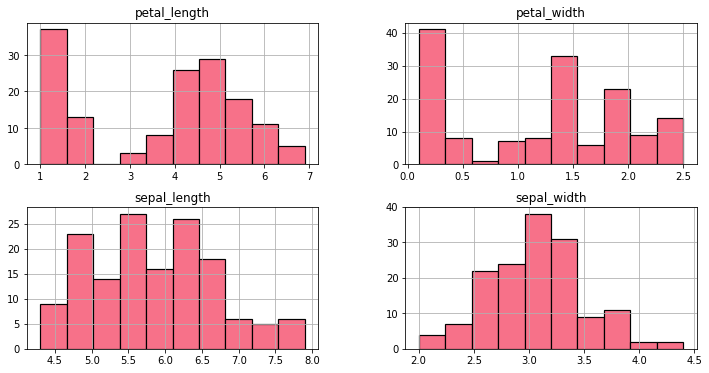

In [74]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Voyons maintenant comment la longueur et la largeur varient selon les espèces.

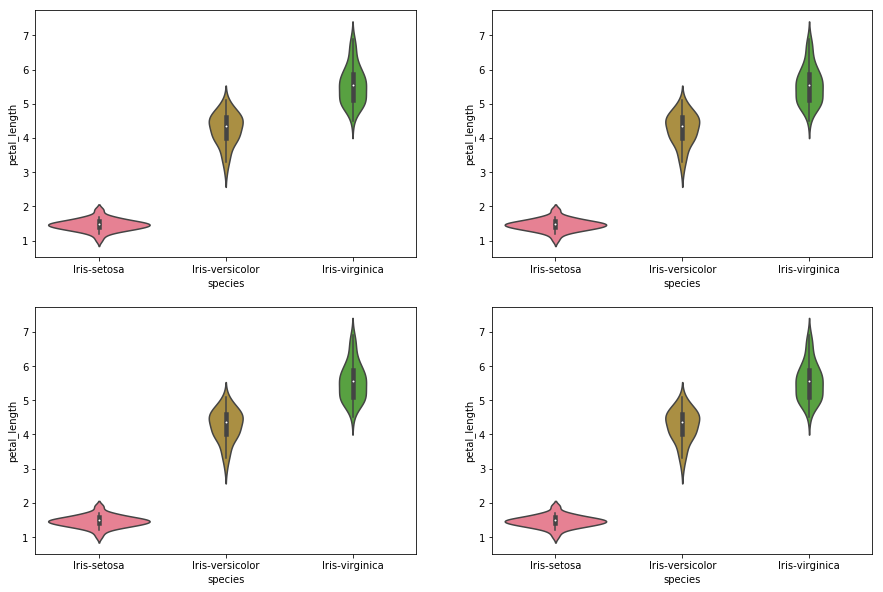

In [77]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_length',data=iris)

Le **violonplot** montre la densité de la longueur et de la largeur de l'espèce. 

**La partie plus mince** indique qu'il y a moins de densité alors que la partie plus grosse donne une densité plus élevée

Maintenant, le problème posé est un problème de **classification**. Nous allons donc utiliser les algorithmes de classification pour construire un modèle.

**Classification:** les échantillons appartiennent à deux classes ou plus et nous voulons apprendre à partir de données déjà étiquetées comment prédire la classe de données non étiquetées.

**Régression:** si la sortie souhaitée consiste en une ou plusieurs variables continues, la tâche est appelée régression. Un exemple de problème de régression serait **la prédiction de la longueur d'un saumon en fonction de son âge et de son poids.**

Avant de commencer, nous devons expliquer certaines notations ML.

**attributs** -> Un attribut est une propriété d'une instance qui peut être utilisée pour déterminer sa classification. Dans le jeu de données suivant, les attributs sont la **longueur** et la **largeur** des pétales et des sépales. Il est également connu sous le nom de **Caractéristiques** (features)

**La variable cible (Target variable)**, dans le contexte d’apprentissage automatique, est la variable qui est ou devrait être la sortie. Ici les variables cibles sont les 3 espèces de fleurs

In [0]:
# Importer tous les paquets nécessaires pour utiliser les différents algorithmes de classification
from sklearn.linear_model import LogisticRegression  # Pour l'algorithme de régression logistique
from sklearn.model_selection import train_test_split # Pour diviser l'ensemble de données pour l'apprentissage' et les tests
from sklearn.neighbors import KNeighborsClassifier  # Pour K plus proches voisins
from sklearn import svm  # Oour l'algorithme SVM (Support Vector Machine)
from sklearn import metrics # Pour vérifier la précision du modèle
from sklearn.tree import DecisionTreeClassifier # Pour utiliser l'algorithme d'arbre de décision

In [80]:
iris.shape

(150, 5)

Maintenant, lorsque nous formons un algorithme, le nombre d'entités et leur corrélation jouent un rôle important.
 
S'il y a des caractéristiques et que beaucoup d'entre elles sont fortement corrélées, l'entraînement d'un algorithme avec toutes les fonctionnalités réduira la précision. Ainsi, la sélection des fonctionnalités doit être faite avec soin. Cet ensemble de données a moins de fonctionnalités mais nous verrons tout de même la corrélation.

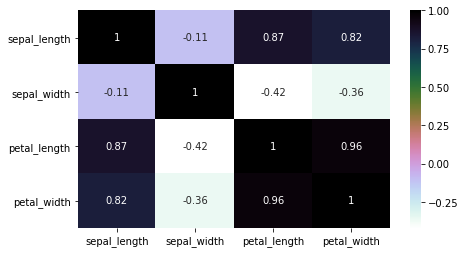

In [82]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') # Dessine la carte thermique avec l'entrée comme matrice de corrélation calculée par (iris.corr ())
plt.show()

**Observation --->**

La largeur et la longueur du sépale ne sont pas corrélées La largeur et la longueur des pétales sont fortement corrélées

Nous allons utiliser toutes les fonctionnalités pour l'apprentissage de l'algorithme et en vérifier l'exactitude.

Nous utiliserons ensuite 1 fonction Pétale et 1 fonction Sépale pour vérifier la précision de l'algorithme, car nous n'utilisons que 2 fonctions non corrélées. Ainsi, nous pouvons avoir une variance dans le jeu de données qui peut aider à une meilleure précision. Nous allons vérifier plus tard.

Étapes à suivre lors de l'application d'un algorithme:



1.   Divisez le jeu de données en jeu de données d'**apprentissage** et de **test**. L'ensemble de données de test est généralement plus petit que celui de l'apprentissage, car il aidera à mieux former le modèle.
2.   Sélectionnez n'importe quel algorithme basé sur le problème **(classification ou régression**) selon ce que vous pensez être bon.
1.   Ensuite, passez le jeu de données d'apprentissage à l'algorithme pour le **former**. Nous utilisons la méthode **.fit ()**
2.   Puis passez les données de test à l’algorithme entraîné pour **prédire le résultat**. Nous utilisons la méthode **.predict ().**
1.   Nous vérifions ensuite la précision en passant le résultat prévu et la sortie réelle au mode







## Fractionnement des données en jeu de données d'apprentissage et de test

In [85]:
train, test = train_test_split(iris, test_size = 0.3) # Dans ce que nos données principales sont divisées en formation et test
# L'attribut test_size = 0.3 divise les données en un rapport de 70% et 30%. train = 70% et test = 30%

print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [87]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']] # prendre les caractéristiques de données d'entraînement
train_y=train.species # sortie de nos données de formation
test_X = test[['sepal_length','sepal_width','petal_length','petal_width']] #prenant des fonctionnalités de données de test
test_y =test.species # valeur de sortie des données de test


On va vérifier l'apprentissage et test de données

In [90]:
train_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
99,5.7,2.8,4.1,1.3
111,6.4,2.7,5.3,1.9


In [91]:
test_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
85,6.0,3.4,4.5,1.6
98,5.1,2.5,3.0,1.1


In [93]:
train_y.head() # sortie des données d'entraînement

99     Iris-versicolor
111     Iris-virginica
109     Iris-virginica
64     Iris-versicolor
71     Iris-versicolor
Name: species, dtype: object

## Support Vector Machine (SVM)

In [95]:
model = svm.SVC() #Sélectionner l'algorithme
model.fit(train_X,train_y) #Nous formons l'algorithme avec les données d'apprentissage et le résultat de l'entraînement
prediction = model.predict(test_X) # maintenant nous passons les données de test à l'algorithme formé
print('La précision du SVM est: ',metrics.accuracy_score(prediction,test_y))
#Maintenant, nous vérifions la précision de l'algorithme.
#nous passons la sortie prévue par le modèle et la sortie réelle

La précision du SVM est:  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM donne une très bonne précision. Nous continuerons à vérifier l'exactitude pour différents modèles.

Nous allons maintenant suivre les mêmes étapes que ci-dessus pour l'apprentissage de divers algorithmes d'apprentissage automatique.

## Logistic regression

In [96]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('La précision pour la regression logistique est: ',metrics.accuracy_score(prediction,test_y))

La précision pour la regression logistique est:  0.9333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Arbre de décision

In [98]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('La précision pour l\'arbre de décision est: ',metrics.accuracy_score(prediction,test_y))

La précision pour l'arbre de décision est:  0.8888888888888888


## K Voisins le plus proches

In [100]:
model = KNeighborsClassifier(n_neighbors=3)
#ceci examine 3 voisins pour mettre les nouvelles données dans une classe
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('La précision pour KNN est : ',metrics.accuracy_score(prediction,test_y))


La précision pour KNN est :  0.9777777777777777


Vérifions l'exactitude de différentes valeurs de n pour K-NN

([<matplotlib.axis.XTick at 0x7fcd65725b38>,
 <a list of 10 Text xticklabel objects>)

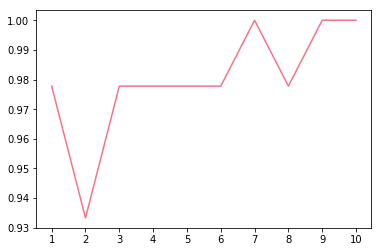

In [101]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

Le graphique ci-dessus montre la précision des modèles KNN avec différentes valeurs de n.

Nous avons utilisé toutes les fonctionnalités de l'iris dans les modèles ci-dessus. Maintenant, nous allons utiliser les pétales et les sépales séparément.

Création de données d'entraînement de pétales et de sépales

In [102]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
petal = iris[['petal_length','petal_width','species']]
sepale = iris[['sepal_length','sepal_width','species']]

In [0]:
#Petal
train_p,test_p = train_test_split(petal, test_size = 0.3, random_state=0)
train_x_p = train_p[['petal_width','petal_length']]
train_y_p = train_p.species

test_x_p = test_p[['petal_width','petal_length']] 
test_y_p = test_p.species

#Sepale
train_s,test_s = train_test_split(sepale, test_size=0.3,random_state=0)
train_x_s = train_s[['sepal_width','sepal_length']]
train_y_s = train_s.species

test_x_s = test_s[['sepal_width','sepal_length']]
test_y_s = test_s.species


## SVM

In [108]:
model = svm.SVC()
model.fit(train_x_p,train_y_p)
prediction = model.predict(test_x_p)
print('LA précision du SVM est de: ',metrics.accuracy_score(prediction,test_y_p))

model = svm.SVC()
model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print('La précision du SVM est de: ',metrics.accuracy_score(prediction,test_y_s))


LA précision du SVM est de:  0.9777777777777777
La précision du SVM est de:  0.8


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Logistic regression

In [109]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p)
prediciton = model.predict(test_x_p)
print('La précision pour la regression logistique est de: ',metrics.accuracy_score(prediction,test_y_p))

model = LogisticRegression()
model.fit(train_x_s,train_y_s)
predition = model.predict(test_x_s)
print('La précision por la regression logisituqe pour sépales est de: ',metrics.accuracy_score(prediction,test_y_s))

La précision pour la regression logistique est de:  0.8
La précision por la regression logisituqe pour sépales est de:  0.8


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Arbre de décision

In [110]:
model = DecisionTreeClassifier()
model.fit(train_x_p,train_y_p)
prediction = model.predict(test_x_p)
print('La précision pour petale sur arbre de décision est de : ',metrics.accuracy_score(prediciton,test_y_p))


model = DecisionTreeClassifier()
model.fit(train_x_s,train_y_s)
prediciton = model.predict(test_x_s)
print('La précision pour sepales sur arbre de décision est de : ',metrics.accuracy_score(prediciton,test_y_s))

La précision pour petale sur arbre de décision est de :  0.6888888888888889
La précision pour sepales sur arbre de décision est de :  0.6444444444444445


## KNN

In [111]:
model = KNeighborsClassifier(n_neighbors=3)
#ceci examine 3 voisins pour mettre les nouvelles données dans une classe
model.fit(train_x_p,train_y_p)
prediction= model.predict(test_x_p)
print('La précision pour KNN est petales: ',metrics.accuracy_score(prediction,test_y_p))


model = KNeighborsClassifier(n_neighbors=3 )
model.fit(train_x_s,train_y_s)
prediciton = model.predict(test_x_s)
print('La précision pour KNN sepales est : ',metrics.accuracy_score(prediction,test_y_s))

La précision pour KNN est petales:  0.9777777777777777
La précision pour KNN sepales est :  0.9777777777777777


**Observations:**
*   L'utilisation de Petals sur Sepal pour l'apprentissage des données donne une bien meilleure précision.
*   Ceci était attendu comme nous l'avons vu dans la carte thermique ci-dessus, que la corrélation entre la largeur et la longueur du sépale était très faible, tandis que la corrélation entre la largeur et la longueur des pétales était très élevée.




Ainsi, nous venons de mettre en œuvre une partie de l'apprentissage machine commun. Comme le jeu de données est petit et comporte très peu d’entités, je n’ai pas abordé certains concepts, car ils seraient pertinents lorsque nous avons beaucoup d’entités.

J'ai compilé un cahier couvrant quelques concepts avancés de ML en utilisant un plus grand ensemble de données. Jetez un coup d'œil à ça aussi.

J'espère que le cahier vous a été utile pour démarrer avec Machine Learning.